<a href="https://colab.research.google.com/github/sekharmm/mandava_IT533/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity
amazon = pd.read_csv("https://raw.githubusercontent.com/sekharmm/mandava_IT533/main/amazon_toy_sample_clean.csv", encoding="ISO-8859-1") # use your own GitHub link here
amazon.dropna(inplace=True)

In [ ]:
amazon.head(5)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...
5,7b8a04095b5e4984c57fd45eb327feb1,100 Deep Red Rose Silk Petals Confetti - Weddi...,Shatchi,0.64,6,new,10,2,4.1,"Party Supplies > Banners, Stickers & Confetti ...",http://www.amazon.co.uk/Valentines | http://ww...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,Technical Details Manufacturer recommended age...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,http://www.amazon.co.uk/300-Deep-Silk-Rose-Pet...,None,Five Stars // 5.0 // 2 Dec. 2015 // By\n \n...


In [ ]:
amazon.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                          float64
number_available_in_stock                        int64
status                                          object
number_of_reviews                                int64
number_of_answered_questions                     int64
average_review_rating_of_5                     float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
dtype: object

In [53]:
a = np.array(amazon.average_review_rating_of_5)

In [ ]:
print(a)

[[4.00000e+00 4.50000e+00 4.50000e+00 ... 5.00000e+00 5.00000e+00
  4.00000e+00]
 [2.90000e-01 3.80000e-01 3.90000e-01 ... 7.19950e+02 9.95110e+02
  2.43992e+03]
 [3.00000e+00 2.00000e+00 2.00000e+00 ... 1.00000e+00 4.00000e+00
  1.00000e+00]]


In [54]:
b = np.array(amazon.price)

In [55]:
dot = np.dot(a, b)  # the dot product
norma = np.linalg.norm(a)  # normalizing vector a
normb = np.linalg.norm(b)  # normalizing vector b
cos1 = dot / (norma * normb) 

In [56]:
print(a,b)

[4.  4.5 4.5 ... 5.  5.  4. ] [2.90000e-01 3.80000e-01 3.90000e-01 ... 7.19950e+02 9.95110e+02
 2.43992e+03]


In [57]:
print(cos1)

0.3996403230765079


In [59]:
angle_in_radians1 = math.acos(cos1)
degrees1 = math.degrees(angle_in_radians1)

print(cos1, angle_in_radians1, degrees1)

0.3996403230765079 1.1596718868327873 66.44430473549154


In [61]:
# First, we convert two attributes to numpy arrays
a = np.array(amazon.average_review_rating_of_5)
b = np.array(amazon.number_of_reviews)

dot = np.dot(a, b)  
norma = np.linalg.norm(a)  
normb = np.linalg.norm(b)  
cos2 = dot / (norma * normb)  

print(cos2)

angle_in_radians2 = math.acos(cos2)
degrees2 = math.degrees(angle_in_radians2)

print(cos2, angle_in_radians2, degrees2)


0.2648202640729923
0.2648202640729923 1.3027787997259128 74.64372686341393


In [62]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler() 
x_scaled = min_max_scaler.fit_transform(x) 
normalized_amazon = pd.DataFrame(x_scaled) 
normalized_amazon=normalized_amazon.rename(columns={0:'price',1:'number_available_in_stock',2:'average_review_rating_of_5'}) 
normalized_amazon 

,price,number_available_in_stock,average_review_rating_of_5
0,0.000000,0.021978,0.80
1,0.000037,0.010989,0.90
2,0.000041,0.065934,0.90
3,0.000127,0.065934,0.86
4,0.000143,0.054945,0.82
...,...,...,...
6307,0.180216,0.109890,0.66
6308,0.183511,0.021978,1.00
6309,0.294987,0.010989,1.00
6310,0.407775,0.010989,1.00


In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 6335
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      6312 non-null   object 
 1   product_name                                 6312 non-null   object 
 2   manufacturer                                 6312 non-null   object 
 3   price                                        6312 non-null   float64
 4   number_available_in_stock                    6312 non-null   int64  
 5   status                                       6312 non-null   object 
 6   number_of_reviews                            6312 non-null   int64  
 7   number_of_answered_questions                 6312 non-null   int64  
 8   average_review_rating_of_5                   6312 non-null   float64
 9   amazon_category_and_sub_category             6312 non-null   object 
 10  

In [ ]:
# Using the COSINE_SIMILARITY FUNCTION from sklearn.metrics
amazon

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...
5,7b8a04095b5e4984c57fd45eb327feb1,100 Deep Red Rose Silk Petals Confetti - Weddi...,Shatchi,0.64,6,new,10,2,4.1,"Party Supplies > Banners, Stickers & Confetti ...",http://www.amazon.co.uk/Valentines | http://ww...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,Technical Details Manufacturer recommended age...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,http://www.amazon.co.uk/300-Deep-Silk-Rose-Pet...,None,Five Stars // 5.0 // 2 Dec. 2015 // By\n \n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,8020c8cd2b86bd2e793241dd321d8921,Parrot Bebop Drone 2 (White),Parrot,439.95,11,new,9,3,3.3,Hobbies > Remote Controlled Devices > Helicopt...,http://www.amazon.co.uk/BTG-Upgrade-Battery310...,Colour Name:White and Black Product Descriptio...,Technical Details Item Weight503 g Product Dim...,Colour Name:White and Black Product Descriptio...,Not available,Can you use the skycontroller from the origina...,Much improved but slightly weird incremental u...
6332,ddd1807f90417adcdf4cd45841239e01,Star Images E.T. Stunt Puppet Replica Action F...,Star images,447.99,3,new,1,3,5.0,Figures & Playsets > Accessories,http://www.amazon.co.uk/12-Inch-Replica-Stunt-...,Product Description E.T. Stunt Puppet Replica ...,Technical Details Item Weight998 g Product Dim...,Product Description E.T. Stunt Puppet Replica ...,http://www.amazon.co.uk/12-Inch-Replica-Stunt-...,Is this made by Neca and is it the 3 foot life...,Five Stars // 5.0 // 25 Oct. 2014 // By\n \...
6333,1e897bf37e4e89aba7cc962f24913fd4,Indiana Jones - 12 Inch Action Figures: Indian...,Sideshow,719.95,2,new,1,1,5.0,Figures & Playsets > Science Fiction & Fantasy,http://www.amazon.co.uk/Indiana-Jones-Masterpi...,Figurine articulÃ©e taille env. 30 cm avec vÃª...,Technical Details Item Weight1.1 Kg Product Di...,Figurine articulÃ©e taille env. 30 cm avec vÃª...,Not available,None,"""It's not the years, sweet heart, it's the mil..."
6334,4f705c302bdcf5d2b0c

In [63]:
# Using the COSINE_SIMILARITY FUNCTION from sklearn.metrics
aa = a.reshape(1,6312) # we have 3 values in our array
ba = b.reshape(1,6312) # we have 3 values in our array
cos3 = cosine_similarity(aa, ba)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians3 = math.acos(cos3)
degrees3 = math.degrees(angle_in_radians3)
 
print(cos3, angle_in_radians3, degrees3)

[[0.26482026]] 1.3027787997259128 74.64372686341393


In [64]:
result = 1 - spatial.distance.cosine(a, b)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians = math.acos(result)
degrees = math.degrees(angle_in_radians)

print(result, degrees)

0.2648202640729924 74.64372686341393


In [65]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 6335
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      6312 non-null   object 
 1   product_name                                 6312 non-null   object 
 2   manufacturer                                 6312 non-null   object 
 3   price                                        6312 non-null   float64
 4   number_available_in_stock                    6312 non-null   int64  
 5   status                                       6312 non-null   object 
 6   number_of_reviews                            6312 non-null   int64  
 7   number_of_answered_questions                 6312 non-null   int64  
 8   average_review_rating_of_5                   6312 non-null   float64
 9   amazon_category_and_sub_category             6312 non-null   object 
 10  

In [67]:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(amazon.status, amazon.amazon_category_and_sub_category).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 418.8867152290768 ,p-value: 0.9999999999932464, Degrees of Freedom: 630


In [70]:
corr = amazon.corr()

In [71]:
corr

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5
price,1.000000,-0.018236,-0.024008,-0.005889,0.013213
number_available_in_stock,-0.018236,1.000000,0.215193,-0.008333,-0.009538
number_of_reviews,-0.024008,0.215193,1.000000,0.020904,-0.089078
number_of_answered_questions,-0.005889,-0.008333,0.020904,1.000000,0.001501
average_review_rating_of_5,0.013213,-0.009538,-0.089078,0.001501,1.000000


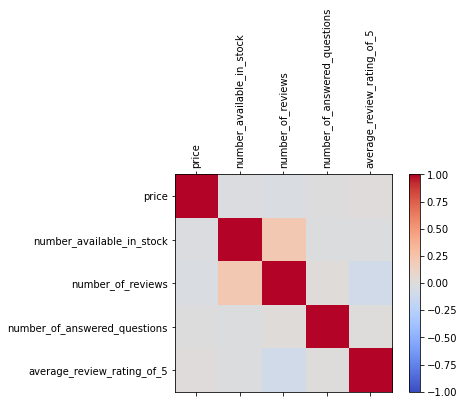

In [72]:
# Now we can make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()